In [187]:
import pandas as pd
# import cupy as np
import numpy as np
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/datasets/training_data.csv')
unique_values = df.iloc[:, 0].unique()
unique_values.sort()
unique_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

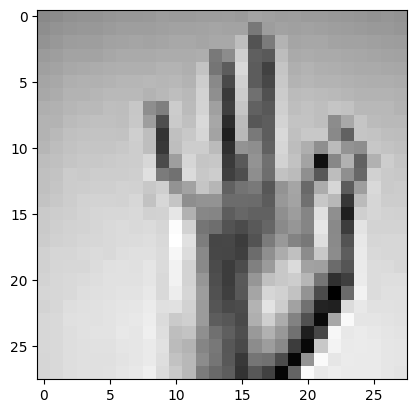

In [189]:
pixel_intensities_1d = df.iloc[1:2,1:].to_numpy()

# Reshape the 1D array to a 2D array (28x28)
pixel_intensities_2d = pixel_intensities_1d.reshape(28, 28)

# Display the grayscale image
plt.imshow(pixel_intensities_2d, cmap='gray', interpolation='none')


In [190]:
dataset = df.to_numpy()
# Define batch size
batch_size = 500
# Calculate number of batches
num_batches = dataset.shape[0] // batch_size
# Ensure the number of batches is as expected
# Split into batches and store in a list
batches = [dataset[i * batch_size:(i + 1) * batch_size] for i in range(num_batches)]

In [191]:
# Initialize lists for X_batches and Y_batches
X_batches = []
Y_batches = []

# Split each batch into X and Y
for batch in batches:
    X = batch[:, 1:]  # Everything except the first column
    Y = batch[:, :1]  # The first column only
    X_batches.append(X)
    Y_batches.append(Y)

In [192]:
Y_batches_ohe = []
for batch in Y_batches:
    arr = batch.flatten()  # Convert to 1D array

    # Ensure all indices are within the valid range
    if np.any(arr >= 25):
        raise ValueError(f"Some indices in `arr` are out of bounds for the identity matrix of size {25}.")

    # One-hot encode the array
    enc_array = np.eye(25)[arr]

    # Append to the list
    Y_batches_ohe.append(enc_array)

In [193]:
def normalize_columns(matrix):
    # Convert matrix to numpy array if it's not already
    matrix = np.array(matrix)

    # Calculate min and max for each column
    max_values = matrix.max(axis=0)

    # Apply the normalization formula
    normalized_matrix = matrix / max_values

    return normalized_matrix

X_normalized = []
for i in X_batches:
  X_normalized.append(normalize_columns(i))

In [194]:
# class Layer:

#   def __init__(self,dimension):
#     self.w = np.ones(dimension)*0.1
#     self.b = np.zeros(dimension[1])

#   def forward(self, in_matrix):
#     return np.tanh(np.dot(in_matrix, self.w) + self.b)

#   def get_softmax(self, in_matrix):
#     z = np.dot(in_matrix, self.w)
#     exp_matrix = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
#     sum_matrix = np.sum(exp_matrix, axis=1, keepdims=True)
#     softmax = exp_matrix / sum_matrix
#     return softmax

In [195]:
# class NeuralNetwork:

#   def __init__(self, no_features, architecture):

#     self.layers = []

#     for i,size in enumerate(architecture):
#       #if the first layer
#       if i == 0:
#         layer = Layer((no_features, size))
#         self.layers.append(layer)
#         continue
#       #if any other layer
#       else:
#         layer = Layer((architecture[i-1],size))
#         self.layers.append(layer)
#         continue

#   def predict(self, X, target):

#     predictions = {}

#     self.z_values = [np.array(X)]

#     for i,layer in enumerate(self.layers):

#       # since i starts from 0 and there is already a value at z_values[0],
#       # for i = 0, we can use z_values[0] only, we dont need to do z_values[i-1] after z is appended now there are 2 indices at z_values = [0], [1]
#       # for i = 1, we can use z_values[1] as the previous value, so this keeps working

#       # If it is the last layer then we are giving the last recorder z value for calculation of softmax
#       if i == len(self.layers)-1:
#         z = layer.get_softmax(self.z_values[i])
#         self.z_values.append(z)
#         continue

#       # If it is not the last layer then we are giving the last recorded z value as the input for dot product
#       else:
#         z = layer.forward(self.z_values[i])
#         self.z_values.append(z)
#         continue

#     #The last value in z_values is the predictions
#     #In the case of a 3 layered neural network with 2 hidden layers we have z_values[0] as X and z_values[1] as z1 and z_values[2] as z2  and z_value[3] as predictions
#     predictions['predictions'] = self.z_values[-1] #Last value of z_values hence it is predictionsI

#     #calculating loss
#     loss_matrix = np.sum(-target*np.log(predictions['predictions'] + 1e-10), axis=1, keepdims=True)
#     predictions['loss'] = np.mean(loss_matrix) #scalar loss

#     #classification rate
#     sum = 0
#     for i,j in zip(target, predictions['predictions']):
#       if np.argmax(i) == np.argmax(j):
#         sum += 1
#     predictions['c_rate'] = sum / target.shape[0]

#     return predictions


#   def train(self, X, target, learning_rate, epochs):
#     for i in range(epochs):

#       prediction = self.predict(X, target)
#       if i % 100 == 0:
#         print(f"loss = {prediction['loss']} classification_rate = {prediction['c_rate']}")

#       delta3 = prediction['predictions'] - target
#       derivative_w3 = np.dot(self.z_values[2].T, delta3) / X.shape[0]
#       derivative_b3 = np.sum(delta3, axis=0) / X.shape[0]

#       delta2 = np.dot(delta3 ,self.layers[2].w.T) * (1 - np.tanh(self.z_values[2])**2)
#       derivative_w2 = np.dot(self.z_values[1].T, delta2) / X.shape[0]
#       derivative_b2 = np.sum(delta2, axis=0) / X.shape[0]

#       delta1 = np.dot(delta2, self.layers[1].w.T) * (1 - (np.tanh(self.z_values[1])**2))
#       derivative_w1 = np.dot(self.z_values[0].T, delta1) / X.shape[0]
#       derivative_b1 = np.sum(delta1, axis=0) / X.shape[0]

#       self.layers[0].w -= learning_rate*derivative_w1
#       self.layers[0].b -= learning_rate*derivative_b1

#       self.layers[1].w -= learning_rate*derivative_w2
#       self.layers[1].b -= learning_rate*derivative_b2

#       self.layers[2].w -= learning_rate*derivative_w3
#       self.layers[2].b -= learning_rate*derivative_b3


In [196]:
class Layer:

  # W is a matrix of size D*N where D = no. of nodes and N = no. of input
  # B is the bias of the layer which is a matrix of D*1 = where D = no. of nodes
  def __init__(self,w,b):
    self.w = w
    self.b = b

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))

  # Given an input layer it gives output after multiplying and applying tanh activation function
  def get_output(self,in_matrix):
    output = np.dot(in_matrix,self.w) + self.b
    output = self.sigmoid(output)
    return output

  def get_softmax(self, in_matrix):
    get_softm_of = np.dot(in_matrix,self.w) + self.b
    # Subtract the max value in each row for numerical stability
    exp_output = np.exp(get_softm_of)
    softmax = exp_output / np.sum(exp_output, axis = 1, keepdims = True)
    return softmax


def l_matrix(target, prediction):
  loss_matrix = -np.sum(target * np.log(prediction), axis=1, keepdims=True)
  return loss_matrix

def loss_scalar(target, prediction):
  loss_matrix = l_matrix(target, prediction)
  loss = np.mean(loss_matrix)
  return loss

def classification_rate(target, prediction):
  sum = 0
  for i, j in zip(target, prediction):
    if np.argmax(i) == np.argmax(j):
      sum += 1
  c_rate = sum / target.shape[0]
  return c_rate


def derivative_w3(z_2, target, predictions):
  return np.dot(z_2.T, (predictions - target)) / z_2.shape[0]

def derivative_b3(target, predictions):
  return np.sum(predictions - target, axis=0) / target.shape[0]

def derivative_w2(z_1, z_2, target, predictions, w3):
  dZ = np.dot((predictions - target), w3.T) * z_2 * (1 - (z_2))
  return np.dot(z_1.T, dZ) / z_1.shape[0]

def derivative_b2(z_2, target, predictions, w3):
  dZ = np.dot((predictions - target), w3.T) * z_2 * (1 - (z_2))
  return np.sum(dZ, axis=0) / z_2.shape[0]

def derivative_w1(z_0, target, predictions, w3, z_2, w2, z_1):
  dZ = np.dot((predictions - target), w3.T) * z_2 * (1 - (z_2))
  dZ1 = np.dot(dZ, w2.T) * z_1 * (1 - (z_1))
  return np.dot(z_0.T, dZ1) / z_0.shape[0]

def derivative_b1(target, predictions, w3, z_2, w2, z_1):
  dZ = np.dot((predictions - target), w3.T) * z_2* (1 - (z_2))
  dZ1 = np.dot(dZ, w2.T) * z_1 * (1 - (z_1))
  return np.sum(dZ1, axis=0) / z_1.shape[0]

def gradient_step(learning_rate,w1,b1,w2,b2,w3,b3,target,predictions,z_1,z_2,z_0):
  w1 -= learning_rate*(derivative_w1(z_0, target, predictions, w3, z_2, w2, z_1))
  b1 -= learning_rate*(derivative_b1(target, predictions, w3, z_2, w2, z_1))

  w2 -= learning_rate*(derivative_w2(z_1, z_2, target, predictions, w3))
  b2 -= learning_rate*(derivative_b2(z_2, target, predictions, w3))

  w3 -= learning_rate*(derivative_w3(z_2, target, predictions))
  b3 -= learning_rate*(derivative_b3(target, predictions))

  return w1, b1, w2, b2, w3, b3


In [198]:
z_0 = X_normalized[0]
w1 = np.random.randn(784, 20)
b1 = np.random.randn(20)
l1 = Layer(w1, b1)
z_1 = l1.get_output(z_0)

w2 = np.random.randn(20, 35)
b2 = np.random.randn(35)
l2 = Layer(w2, b2)
z_2 = l2.get_output(z_1)

w3 = np.random.randn(35, 25)
b3 = np.random.randn(25)
l3 = Layer(w3, b3)
z_3 = l3.get_softmax(z_2)

print(f'Loss = {loss_scalar(Y_batches_ohe[0], z_3)}\nAccuracy = {classification_rate(Y_batches_ohe[0], z_3)}')

Loss = 5.915496386009589
Accuracy = 0.048


In [199]:
for j in range(len(X_normalized[0])-1):
  print(f'Training for {j} - batch')
  z_0 = X_normalized[j]
  for i in range(1100):
    l1.w, l1.b, l2.w, l2.b, l3.w, l3.b = gradient_step(0.1,l1.w,l1.b,l2.w,l2.b,l3.w,l3.b,Y_batches_ohe[j],z_3,z_1,z_2,z_0)
    z_1 = l1.get_output(z_0)
    z_2 = l2.get_output(z_1)
    z_3 = l3.get_softmax(z_2)

    if (i % 100 == 0):
      print(f'{i} - iteration')
      print(f'loss = {loss_scalar(Y_batches_ohe[j], z_3)}')
      print(f'accuracy = {classification_rate(Y_batches_ohe[j], z_3)}')

Training for 0 - batch
0 - iteration
loss = 5.6587549124205525
accuracy = 0.048
100 - iteration
loss = 3.014557157760313
accuracy = 0.122
200 - iteration
loss = 2.8956398102844543
accuracy = 0.166
300 - iteration
loss = 2.7953440125238753
accuracy = 0.192
400 - iteration
loss = 2.7069495876158327
accuracy = 0.228
500 - iteration
loss = 2.6290110612399165
accuracy = 0.256
600 - iteration
loss = 2.5617271674063784
accuracy = 0.27
700 - iteration
loss = 2.5042143564567834
accuracy = 0.292
800 - iteration
loss = 2.4533067897672898
accuracy = 0.298
900 - iteration
loss = 2.406339283579654
accuracy = 0.314
1000 - iteration
loss = 2.361789758900205
accuracy = 0.332
Training for 1 - batch
0 - iteration
loss = 2.6341894642601185
accuracy = 0.248
100 - iteration
loss = 2.4963249283072946
accuracy = 0.26
200 - iteration
loss = 2.3897263906980544
accuracy = 0.28
300 - iteration
loss = 2.293572502819852
accuracy = 0.316
400 - iteration
loss = 2.163092298441156
accuracy = 0.354
500 - iteration
loss 

IndexError: list index out of range